#  Features 


- cell orientation 
 - location of soma in standardized brain map 
 - general axial orientation 
 - location of projection termini
- morphology 
 - dendrite structure 
 - number of branches 
 - thickness 

In [1]:
import pymongo 
import seaborn as sns
import numpy as np
sns.set()

In [2]:
client = pymongo.MongoClient('mongodb://localhost/:27017')
db = client.aibs 
print db.collection_names()
n_coll = db.neurons

[u'nmorpho', u'morphology', u'neurons']


In [ ]:
n_coll.find_one()

In [ ]:
n_coll.count()

In [69]:
# remove duplicates 
len(list(n_coll.aggregate([{'$group':{'_id':'$id', 'count' : {'$sum' : 1}}}])))

402

In [68]:
[a['weight'] for a in n_coll.find({'id':576095991})]

[9000, 9000, 9000]

In [78]:
def remove_dupes(coll):
    cursor = coll.aggregate(
        [
            {"$group": {"_id": "$id", "unique_ids": {"$addToSet": "$_id"}, "count": {"$sum": 1}}},
            {"$match": {"count": { "$gte": 2 }}}
        ])

    response = []
    for doc in cursor:
        del doc["unique_ids"][0]
        for id in doc["unique_ids"]:
            response.append(id)

    coll.remove({"_id": {"$in": response}})

In [93]:
n_coll.count()

402

In [91]:
list(a['id'] for a in n_coll.find({'_id': response[3]}))

[539653924]

In [7]:
n_coll.find_one()['ephys_features']

[{u'adaptation': 0.0200246041488773,
  u'avg_isi': 77.6227272727273,
  u'electrode_0_pa': 19.1274981964362,
  u'f_i_curve_slope': 0.275,
  u'fast_trough_t_long_square': 1.330675,
  u'fast_trough_t_ramp': 4.52297333333333,
  u'fast_trough_t_short_square': 1.02486833333333,
  u'fast_trough_v_long_square': -40.90625,
  u'fast_trough_v_ramp': -44.5104166666667,
  u'fast_trough_v_short_square': -47.1979204813639,
  u'has_burst': False,
  u'has_delay': False,
  u'has_pause': False,
  u'id': 483153893,
  u'input_resistance_mohm': 116.738032,
  u'latency': 0.0789650000000002,
  u'peak_t_long_square': 1.32797,
  u'peak_t_ramp': 4.52128333333333,
  u'peak_t_short_square': 1.023465,
  u'peak_v_long_square': 23.25,
  u'peak_v_ramp': 42.5520846048991,
  u'peak_v_short_square': 31.0312512715658,
  u'rheobase_sweep_id': 475460278,
  u'rheobase_sweep_number': 52,
  u'ri': 182.968750596046,
  u'sag': 0.0105836531147361,
  u'seal_gohm': 1.536360832,
  u'slow_trough_t_long_square': 1.37091,
  u'slow_trou

In [12]:
import numpy as np

In [36]:
vrest = np.array([a['ephys_features'][0]['vrest'] for a in n_coll.find({'ephys_features.vrest':{'$exists':True}},['ephys_features.vrest'])])

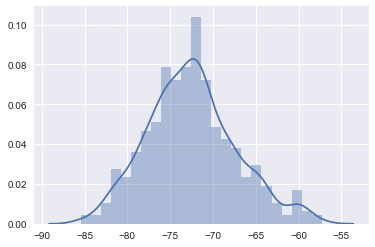

In [45]:
sns.distplot(vrest)

In [ ]:
coll.find({'ephys_features.'})

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
vrest

array([{u'_id': ObjectId('5a7d00839d477ae99327342b')},
       {u'_id': ObjectId('5a7d00839d477ae99327342c')},
       {u'_id': ObjectId('5a7d00839d477ae99327342d')}, ...,
       {u'_id': ObjectId('5a80d3bc9d477a1d615ee1b2')},
       {u'_id': ObjectId('5a80d3bc9d477a1d615ee1b3')},
       {u'_id': ObjectId('5a80d3bc9d477a1d615ee1b4')}], dtype=object)

In [8]:
import neurom as nm